<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#TMB-top-annotation" data-toc-modified-id="TMB-top-annotation-4.1">TMB top annotation</a></span></li><li><span><a href="#Heatmaps" data-toc-modified-id="Heatmaps-4.2">Heatmaps</a></span></li><li><span><a href="#Oncoprint" data-toc-modified-id="Oncoprint-4.3">Oncoprint</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(ggplot2)
library(circlize)
library(ComplexHeatmap)
library(car)

circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


Loading required package: carData



# Functions


In [3]:
cohorts_hm.fx <- function(cohorts_mat){
 
    colpal <- c("NHL" = "#006d2c", #green
                "HL" = "#00f663",
                "NBL" = "#cccc00", #yellow
                "OS" = "#f1eef6",   # blue      
                "RMS" = "#bdc9e1",  # blue
                "SARC" = "#74a9cf", # blue
                "EWS" = "#045a8d",  # blue
                "WILMS" = "#9F1214", #red
                "RT" = "#884692", #purple
                "Others" = "#757172") #grey

    cohort_hm = Heatmap(cohorts_mat,
                        #titles and names
                        name = "Cohort",
                        show_row_names = TRUE,
                        show_column_names = FALSE,    
                        #clusters
                        cluster_columns = FALSE,
                        cluster_rows = FALSE,
                        #aesthestics
                        col = colpal,
                        column_names_gp = gpar(fontsize = 15),
                        height = unit(1, "cm"),
                        row_names_gp = gpar(fontsize = 20))
    return(cohort_hm)   
}

In [4]:
response_hm.fx <- function(response_mat){

    colpal <- c("PD" = "#e41a1c",
                "PR" = "#4daf4a",
                "SD" = "#ffff33",
                "NE" = "grey")

    response_hm = Heatmap(response_mat,
                          #titles and names
                          name = "RECIST Response",
                          show_row_names = TRUE,
                          show_column_names = FALSE,    
                          #clusters
                          cluster_columns = FALSE,
                          cluster_rows = FALSE,
                          #aesthestics
                          col = colpal,
                          row_names_gp = gpar(fontsize = 20),
                          height = unit(1, "cm"),
                          column_title_gp = gpar(fontsize = 42),
                          row_title = NULL)
    return(response_hm)
    
}

In [5]:
type_hm.fx <- function(tumortype_mat){

    colpal <- c("Primary" = "#d8daeb",
                "Metastatic" = "#542788")

    type_hm = Heatmap(tumortype_mat,
                          #titles and names
                          name = "Tumour type",
                          show_row_names = TRUE,
                          show_column_names = FALSE,    
                          #clusters
                          cluster_columns = FALSE,
                          cluster_rows = FALSE,
                          #aesthestics
                          col = colpal,
                          row_names_gp = gpar(fontsize = 20),
                          height = unit(1, "cm"),
                          column_title_gp = gpar(fontsize = 42),
                          row_title = NULL)
    return(type_hm)
}

In [6]:
cancer_hm.fx <- function(cancer_mat){

    colpal <- c("Lymphoma" = "#2c7fb8",
                "Solid tumour" = "#edf8b1")

    cancer_hm = Heatmap(cancer_mat,
                          #titles and names
                          name = "Cancer group",
                          show_row_names = TRUE,
                          show_column_names = FALSE,    
                          #clusters
                          cluster_columns = FALSE,
                          cluster_rows = FALSE,
                          #aesthestics
                          col = colpal,
                          row_names_gp = gpar(fontsize = 20),
                          height = unit(1, "cm"),
                          column_title_gp = gpar(fontsize = 42),
                          row_title = NULL)
    return(cancer_hm)
}

# Paths

In [7]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Manifests/"

# Main

In [8]:
metadata <- read.csv(file.path(datapath,"IND_estimate_metadata_IHC_trb_tmb.csv"),header = T, stringsAsFactors = F, 
                     check.names = F)

In [9]:
head(metadata)

,SAMPLE.ID,sample_id,Patient.ID.x,STUDYID,USUBJID,AGE,AGEU,TRTDUR,COHORT,TTYPE,⋯,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,ALIQUOT,SUBJECT.ID,QC_Status,TMB_Score,TMB_Confidence,PDL1
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
1,06520001B,06520001B0023R,11010601,GO29664,GO29664-283971-11010601,19,YEARS,1,Cohort 6 (OSTEOSARCOMA),OSTEOSARCOMA,⋯,1.481,10.086,11.566,2.101,TRF185855.01,601,PASS,1.75,VALID,No expression
2,06520003C,06520003C0012R,11010202,GO29664,GO29664-283658-11010202,17,YEARS,108,Cohort 2 (HODGKIN LYMPHOMA),HODGKIN LYMPHOMA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,High
3,06520004C,06520004C0018R,11010201,GO29664,GO29664-283658-11010201,17,YEARS,652,Cohort 2 (HODGKIN LYMPHOMA),HODGKIN LYMPHOMA,⋯,0.656,156.560,157.183,0.791,TRF185857.01,201,QUALIFIED,2.63,LOWER_BOUND,High
4,06520005C,06520005C0017R,11010701,GO29664,GO29664-283971-11010701,11,YEARS,22,Cohort 7 (RHABDOMYOSARCOMA ),RHABDOMYOSARCOMA - ALVEOLAR,⋯,0.696,11.308,11.425,0.427,TRF185858.01,701,QUALIFIED,8.77,VALID,No expression
5,06520006C,06520006C0016R,11010702,GO29664,GO29664-283504-11010702,5,YEARS,23,Cohort 7 (RHABDOMYOSARCOMA ),RHABDOMYOSARCOMA - UNKNOWN,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,No expression
6,06520007C,06520007C0018R,11010604,GO29664,GO29664-283971-11010604,22,YEARS,65,Cohort 6 (OSTEOSARCOMA),OSTEOSARCOMA,⋯,0.856,30.509,30.552,0.572,TRF185859.01,604,PASS,3.51,VALID,No expression


Load foundation one file

In [10]:
f1 <- read.table(paste0(datapath, "ngs_dna_foundationone.txt"), sep = "\t",
                stringsAsFactors = F, header = T)

In [11]:
length(unique(f1$FMI.SAMPLE.ID))

[1] 60

In [12]:
head(f1)

,FMI.SAMPLE.ID,SUBJECT.ID,SAMPLE.ID,ALIQUOT,VARIANT.TYPE,GENE,SOMATIC.STATUS.FUNCTIONAL.IMPACT,TRANSCRIPT,SV.PROTEIN.CHANGE,SV.CDS.CHANGE,⋯,CNA.RATIO,CNA.TYPE,CNA.POS,REARR.GENE1,REARR.GENE2,REARR.DESCRIPTION,REARR.IN.FRAME.,REARR.POS1,REARR.POS2,REARR.NUMBER.OF.READS
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TRF185855,601,06520001B,TRF185855.01,short-variant,FANCG,likely,NM_004629,K618fs*3,1852_1853delAA,⋯,-,-,-,-,-,-,-,-,-,-
2,TRF185855,601,06520001B,TRF185855.01,short-variant,ATR,unknown,NM_001184,V2620M,7858G>A,⋯,-,-,-,-,-,-,-,-,-,-
3,TRF185855,601,06520001B,TRF185855.01,short-variant,CDK12,unknown,NM_016507,A1289T,3865G>A,⋯,-,-,-,-,-,-,-,-,-,-
4,TRF185855,601,06520001B,TRF185855.01,short-variant,FAT1,unknown,NM_005245,A4419T,13255G>A,⋯,-,-,-,-,-,-,-,-,-,-
5,TRF185855,601,06520001B,TRF185855.01,short-variant,INHBA,unknown,NM_002192,V210L,628G>C,⋯,-,-,-,-,-,-,-,-,-,-
6,TRF185855,601,06520001B,TRF185855.01,short-variant,NCOR1,unknown,NM_006311,Q1372H,4116G>C,⋯,-,-,-,-,-,-,-,-,-,-


Only those with fmi data

In [13]:
metadata_f1 <- metadata[ !is.na(metadata$TMB_Score),]

In [14]:
summary(metadata_f1$TMB_Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.750   2.630   3.939   4.825  18.430 

In [15]:
#recode 0 to 0.01 
metadata_f1$TMB <- metadata_f1$TMB_Score
metadata_f1$TMB[metadata_f1$TMB == 0] <- 0.01

In [16]:
metadata_f1 <- metadata_f1[order(metadata_f1$cancer, metadata_f1$TMB),]

In [17]:
dim(metadata_f1)

[1] 51 78

## TMB top annotation

Make a top annotation for TMB log10 

In [18]:
metadata_f1$log10TMB <- log10(metadata_f1$TMB)

In [19]:
summary(metadata_f1$log10TMB)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.0000  0.2430  0.4200  0.3162  0.6817  1.2655 

In [20]:
TMB_ha = HeatmapAnnotation(TMB = anno_points(metadata_f1$log10TMB, height = unit(8,"cm"), size = unit(15, "pt"),
                       axis_param = list(at = c(-2,-1,0, 1, 2),
                                        labels = c("0.01","0.1", "1", "10", "100")
                                        )
                                        )
                      )

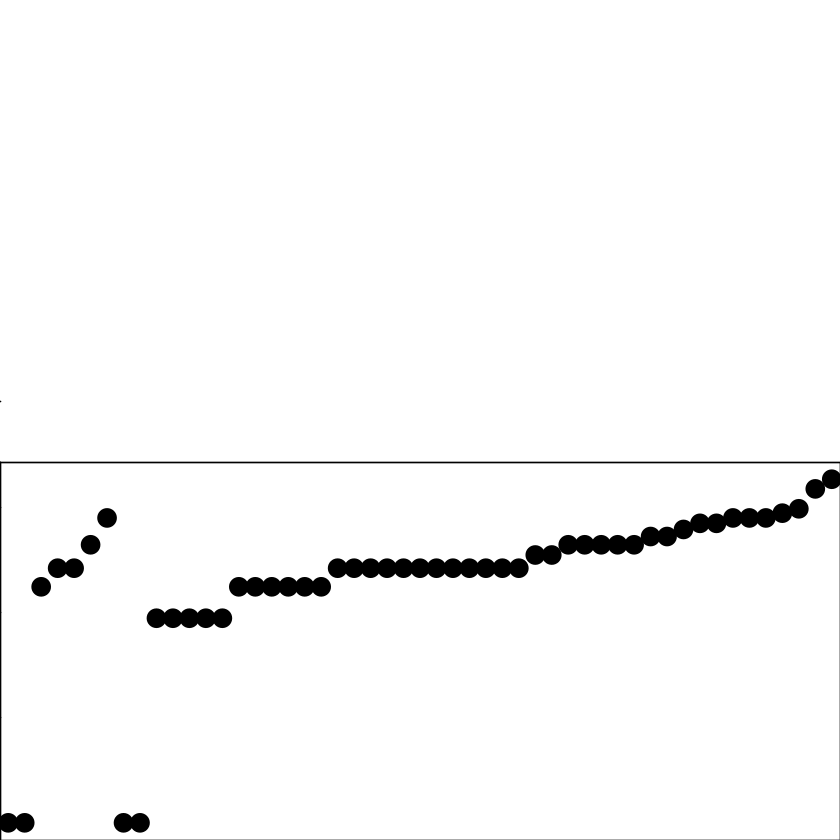

In [21]:
draw(TMB_ha)

## Heatmaps

In [22]:
mycancer <- metadata_f1$cancer
names(mycancer) <- metadata_f1$SAMPLE.ID
mycancer <- t(as.matrix(mycancer))
rownames(mycancer) <- "Cancer group"

cancer_hm <- cancer_hm.fx(mycancer)

In [23]:
mytype <- metadata_f1$tumor_type
names(mytype) <- metadata_f1$SAMPLE.ID
mytype <- t(as.matrix(mytype))
rownames(mytype) <- "Primary/Metastatic"

type_hm <- type_hm.fx(mytype)

In [24]:
#include NHL and HL
metadata_f1$disease_group[ metadata_f1$COHORT == "Cohort 4 (NON HODGKIN LYMPHOMA)"] <- "NHL"

metadata_f1$disease_group[ metadata_f1$COHORT == "Cohort 2 (HODGKIN LYMPHOMA)"] <- "HL"

In [25]:
mycancers <- metadata_f1$disease_group
names(mycancers) <- metadata_f1$SAMPLE.ID
mycancers <- t(as.matrix(mycancers))
rownames(mycancers) <- "Cohort"

cohort_hm <- cohorts_hm.fx(mycancers)

In [26]:
myresponse <- metadata_f1$AVALC
names(myresponse) <- metadata_f1$SAMPLE.ID
myresponse <- t(as.matrix(myresponse))
rownames(myresponse) <- "Objective response"

response_hm <- response_hm.fx(myresponse)

## Oncoprint

In [27]:
table(f1$VARIANT.TYPE)


copy-number-alteration          rearrangement          short-variant 
                    66                     20                    606 

In [28]:
length(unique(f1$SAMPLE.ID))

[1] 60

In [29]:
f1 <- f1[ f1$SAMPLE.ID %in% metadata_f1$SAMPLE.ID,]

In [30]:
length(unique(f1$SAMPLE.ID))

[1] 51

In [31]:
oncomat <- matrix(ncol = nrow(metadata_f1), nrow = length(unique(f1$GENE)))
colnames(oncomat) <- metadata_f1$SAMPLE.ID
rownames(oncomat) <- unique(f1$GENE)

In [32]:
for(i in 1:ncol(oncomat)){
    mysampleid <- colnames(oncomat)[i]
    mygenes <- f1[f1$SAMPLE.ID == mysampleid,]
    oncomat[,i] <- mygenes$VARIANT.TYPE[match(rownames(oncomat),mygenes$GENE)]
    }

Remove genes with <= 5 alterations

In [33]:
oncomat <- oncomat[rowSums(!is.na(oncomat)) > 4, ]

In [34]:
dim(oncomat)

[1] 25 51

In [35]:
oncomat[3,]

06520094C                06520100B                06520060B 
                      NA                       NA                       NA 
               06520004C                06520090C                06520033C 
                      NA                       NA                       NA 
               06520097B                06520067C                06520091B 
                      NA                       NA                       NA 
               06520011B                06520055C                06520058C 
                      NA                       NA                       NA 
               06520070C                06520095B                06520001B 
                      NA                       NA          "rearrangement" 
               06520019C                06520020C                06520026C 
                      NA                       NA                       NA 
               06520037C                06520103C                06520010B 
                      NA          "short-variant"                       NA 
               06520017C                06520018C                06520022C 
                      NA                       NA                       NA 
               06520023C                06520046C                06520049C 
                      NA                       NA                       NA 
               06520069C                06520071C                06520078C 
                      NA                       NA          "short-variant" 
               06520105C                06520110C                06520007C 
                      NA                       NA                       NA 
               06520068B                06520059B                06520072C 
                      NA                       NA                       NA 
               06520075C                06520082C                06520104C 
                      NA                       NA          "short-variant" 
               06520031C                06520051C                06520052C 
"copy-number-alteration"          "short-variant"                       NA 
               06520029C                06520080B                06520030C 
                      NA                       NA                       NA 
               06520042B                06520106C                06520005C 
         "short-variant"          "short-variant"                       NA 
               06520038B                06520047C                06520045C 
                      NA                       NA                       NA

In [36]:
oncomat[is.na(oncomat)] <- ""

In [37]:
col = c("short-variant" = "#e41a1c", 
        "rearrangement" = "#377eb8",
        "copy-number-alteration" = "#984ea3")

In [38]:
alter_fun = list(
    background = function(x, y, w, h){
      grid.rect(x, y, w, h, 
                gp = gpar(fill = "#e3e4e7",
                          col = NA))},
    "short-variant" = function(x, y, w, h){
      grid.rect(x, y, w*0.9, h*0.9, 
                gp = gpar(fill = col["short-variant"], 
                          col = NA))},
    "rearrangement" = function(x, y, w, h){ 
      grid.rect(x, y, w*0.9, h*0.9, 
                gp = gpar(fill = col["rearrangement"], 
                          col = NA))},
    "copy-number-alteration" = function(x,y,w,h){ 
      grid.rect(x,y,w*0.9,h*0.9, 
                gp = gpar(fill = col["copy-number-alteration"], 
                          col = NA))}
  )

In [39]:
onco = oncoPrint(oncomat,
                 alter_fun = alter_fun,
                 col = col, 
                 top_annotation = NULL,
                 height = unit(25, "cm"),
                 column_order = metadata_f1$SAMPLE.ID,
                 show_heatmap_legend = TRUE,
                 show_column_names = TRUE,
                 row_names_gp = gpar(fontsize = 20),
                 remove_empty_rows = TRUE,
                 show_pct = TRUE, 
                 pct_gp = gpar(fontsize = 20),
                 right_annotation = NULL) 

All mutation types: short-variant, rearrangement,
copy-number-alteration.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.



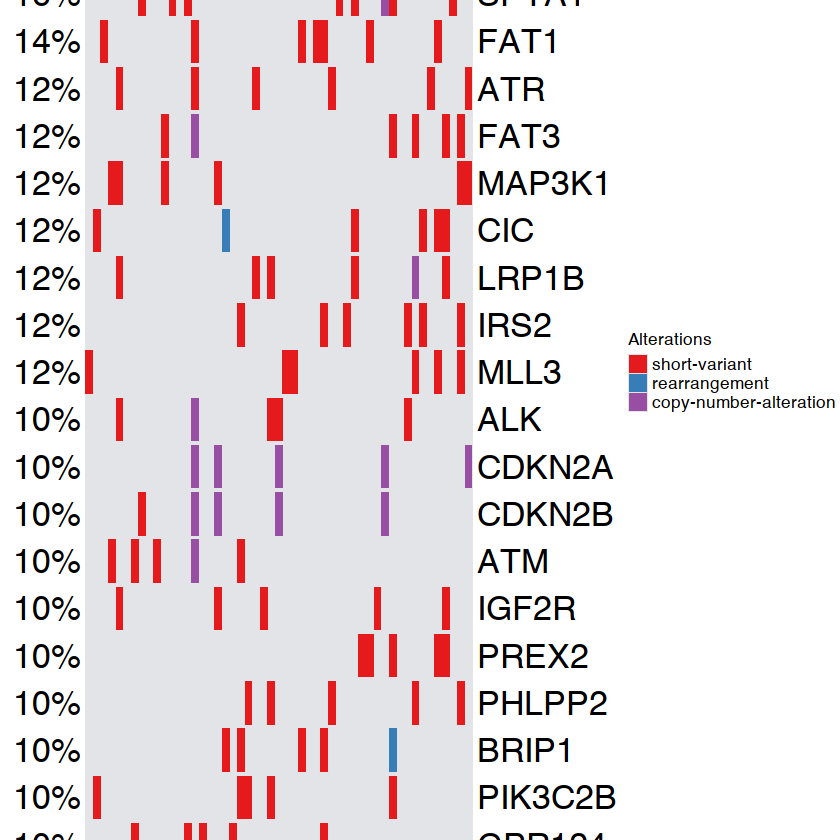

In [40]:
onco

In [41]:
pdf(file = paste0(plotpath,"oncoprint.pdf"),
        width = 25, 
        height = 40,
        useDingbats = FALSE)
draw(TMB_ha %v% onco %v% cohort_hm %v% type_hm %v% response_hm)
dev.off()

pdf 
  2